In [42]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [43]:
cost=np.array([[10.2,8.3,6.5,4.66,2.95],
[7.16,5.8,4.5,3.3,2.0],
[3.94,3.19,2.52,1.8,1.08],
[2.73,2.2,1.75,1.26,0.77],
[2,1.67,1.31,0.927,0.592],
[1.56,1.288,1,0.75,0.49],
[1.185,0.953,0.747,0.541,0.361]])
cost=cost.T

### DN500的管子

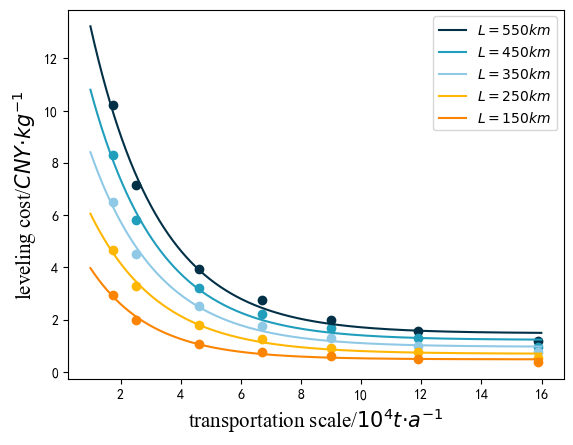

{'$L=550km$': [18.202669981464027, 2.2886039193815226, 1.472591352807521],
 '$L=450km$': [14.93262244004974, 2.2550239316993217, 1.218351347955261],
 '$L=350km$': [11.574120699954621, 2.273236653776211, 0.9547104089275845],
 '$L=250km$': [8.30486467006721, 2.288265661553827, 0.687735363147274],
 '$L=150km$': [5.7619053628582675, 2.0010395872186417, 0.47513634256084264]}

In [46]:
from scipy import optimize as op
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
# plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
def f(x, a0, a1, a2):
    return a0 * np.exp(-x / a1) + a2
x=np.array([1.75,2.5,4.6,6.7,9,11.9,15.89])
X = np.arange(1, 16, 0.01)
color=['#023047','#219ebc','#90c9e6','#ffb703','#fb8402']
label=['$L=550km$','$L=450km$','$L=350km$','$L=250km$','$L=150km$']
coefficient={}
for i in range(cost.shape[0]):
    op.curve_fit(f, x, cost[i]) # 进行拟合
    a0, a1, a2 = op.curve_fit(f, x, cost[i])[0]
    coefficient[label[i]] = [a0,a1,a2]
    plt.scatter(x, cost[i], marker='o',c=color[i])
    y = a0 * np.exp(-X / a1) + a2
    plt.plot(X, y,c=color[i],label=label[i])
plt.legend() # 显示label
plt.xlabel('transportation scale/$10^4t·a^{-1}$',fontdict={"family":"Times New Roman","size":15})
plt.ylabel('leveling cost/$CNY·kg^{-1}$',fontdict={"family":"Times New Roman","size":15})
plt.show()

coefficient